# Pandas教程
by 褚则伟 
### 关于Merge, Join和Concatenate

## 目录
- Merge
- Join
- append
- Concatenate

### concatenate

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.DataFrame({"apts": [55000, 60000],
                   "cars": [200000, 300000]},
                  index = ["Shanghai", "Beijing"])

In [3]:
df1

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000


In [4]:
df2 = pd.DataFrame({'apts': [25000, 20000],
                   'cars': [150000, 120000],},
                  index = ['Hangzhou', 'Najing'])
print(df2)

           apts    cars
Hangzhou  25000  150000
Najing    20000  120000


In [5]:
df3 = pd.DataFrame({'apts': [30000, 10000],
                   'cars': [180000, 100000],},
                  index = ['Guangzhou', 'Chongqing'])
print(df3)

            apts    cars
Guangzhou  30000  180000
Chongqing  10000  100000


In [22]:
result = pd.concat([df1, df2, df3])
result

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Hangzhou,25000,150000
Najing,20000,120000
Guangzhou,30000,180000
Chongqing,10000,100000


在concatenate的时候可以指定keys，这样可以给每一个部分加上一个Key。

以下的例子就构造了一个hierarchical index。

In [9]:
result2 = pd.concat([df1, df2, df3], keys=["x", "y", "z"])

In [10]:
result2.loc["y"]

,apts,cars
Hangzhou,25000,150000
Najing,20000,120000


如果要换个方向concat，只要声明axis就可以了

In [11]:
df4 = pd.DataFrame({'salaries': [10000, 30000, 30000, 20000, 15000]},
                  index = ['Suzhou', 'Beijing', 'Shanghai', 'Guangzhou', 'Tianjin'])
print(df4)

           salaries
Suzhou        10000
Beijing       30000
Shanghai      30000
Guangzhou     20000
Tianjin       15000


In [26]:
result3 = pd.concat([result, df4], axis=1)
result3

,apts,cars,salaries
Beijing,60000.0,300000.0,30000.0
Chongqing,10000.0,100000.0,NaN
Guangzhou,30000.0,180000.0,20000.0
Hangzhou,25000.0,150000.0,NaN
Najing,20000.0,120000.0,NaN
Shanghai,55000.0,200000.0,30000.0
Suzhou,NaN,NaN,10000.0
Tianjin,NaN,NaN,15000.0


用inner可以去掉NaN,也就是说如果出现了不匹配的行就会被忽略

In [19]:
result4 = pd.concat([result, df4], axis=1, join="inner")
print(result4)

            apts    cars  salaries
Shanghai   55000  200000     30000
Beijing    60000  300000     30000
Guangzhou  30000  180000     20000


如果我们只想保留左边部分的index呢

In [24]:
result5 = pd.concat([result, df4], axis=1, join_axes=[result.index])
print(result5)

            apts    cars  salaries
Shanghai   55000  200000   30000.0
Beijing    60000  300000   30000.0
Hangzhou   25000  150000       NaN
Najing     20000  120000       NaN
Guangzhou  30000  180000   20000.0
Chongqing  10000  100000       NaN


右边部分

In [27]:
result6 = pd.concat([result, df4], axis=1, join_axes=[df4.index])
print(result6)

              apts      cars  salaries
Suzhou         NaN       NaN     10000
Beijing    60000.0  300000.0     30000
Shanghai   55000.0  200000.0     30000
Guangzhou  30000.0  180000.0     20000
Tianjin        NaN       NaN     15000


#### 用[```append```](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html)来做concatenation 

In [30]:
df1.append(df2)

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Hangzhou,25000,150000
Najing,20000,120000


In [31]:
df1.append(df4)

,apts,cars,salaries
Shanghai,55000.0,200000.0,NaN
Beijing,60000.0,300000.0,NaN
Suzhou,NaN,NaN,10000.0
Beijing,NaN,NaN,30000.0
Shanghai,NaN,NaN,30000.0
Guangzhou,NaN,NaN,20000.0
Tianjin,NaN,NaN,15000.0


In [32]:
df1.append([df2, df3])

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Hangzhou,25000,150000
Najing,20000,120000
Guangzhou,30000,180000
Chongqing,10000,100000


Series和DataFrame还可以被一起concatenate，这时候Series会先被转成DataFrame然后做Join，因为Series本来就是一个只有一维的DataFrame对吧。

In [33]:
s1 = pd.Series([60, 50], index=["Shanghai", "Beijing"], name="meal")
s1

Shanghai    60
Beijing     50
Name: meal, dtype: int64

In [35]:
pd.concat([df1, s1], axis=1)

,apts,cars,meal
Shanghai,55000,200000,60
Beijing,60000,300000,50


下面讲如何append一个row到DataFrame里。

In [36]:
s2 = pd.Series([180000, 120000], index=["apts", "cars"], name="Xiamen")
s2

apts    180000
cars    120000
Name: Xiamen, dtype: int64

In [37]:
df1.append(s2)

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Xiamen,180000,120000


### Merge(Join)

In [41]:
result = result.reset_index().rename(columns={"index": "cities"})

In [44]:
df4 = df4.reset_index().rename(columns={"index": "cities"})

In [46]:
pd.merge(result, df4, on="cities")

,cities,apts,cars,salaries
0,Shanghai,55000,200000,30000
1,Beijing,60000,300000,30000
2,Guangzhou,30000,180000,20000


In [47]:
pd.merge(result, df4, on="cities", how="outer")

,cities,apts,cars,salaries
0,Shanghai,55000.0,200000.0,30000.0
1,Beijing,60000.0,300000.0,30000.0
2,Hangzhou,25000.0,150000.0,NaN
3,Najing,20000.0,120000.0,NaN
4,Guangzhou,30000.0,180000.0,20000.0
5,Chongqing,10000.0,100000.0,NaN
6,Suzhou,NaN,NaN,10000.0
7,Tianjin,NaN,NaN,15000.0


In [49]:
pd.merge(result, df4, on="cities", how="left")

,cities,apts,cars,salaries
0,Shanghai,55000,200000,30000.0
1,Beijing,60000,300000,30000.0
2,Hangzhou,25000,150000,NaN
3,Najing,20000,120000,NaN
4,Guangzhou,30000,180000,20000.0
5,Chongqing,10000,100000,NaN


#### join on index

In [50]:
df1

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000


In [53]:
df4 = df4.set_index("cities")

In [57]:
df1.join(df4, how="right")

,apts,cars,salaries
cities,,,
Suzhou,NaN,NaN,10000
Beijing,60000.0,300000.0,30000
Shanghai,55000.0,200000.0,30000
Guangzhou,NaN,NaN,20000
Tianjin,NaN,NaN,15000


也可以用merge来写

In [59]:
pd.merge(df1, df4, left_index=True, right_index=True, how="outer")

,apts,cars,salaries
Beijing,60000.0,300000.0,30000
Guangzhou,NaN,NaN,20000
Shanghai,55000.0,200000.0,30000
Suzhou,NaN,NaN,10000
Tianjin,NaN,NaN,15000


In [63]:
pd.concat([df1, df4], axis=1, join_axes=[df4.index])

,apts,cars,salaries
cities,,,
Suzhou,NaN,NaN,10000
Beijing,60000.0,300000.0,30000
Shanghai,55000.0,200000.0,30000
Guangzhou,NaN,NaN,20000
Tianjin,NaN,NaN,15000


In [66]:
goog = pd.read_csv("data/GOOG.csv", index_col=0, parse_dates=["Date"])
goog.shape

(3253, 6)

In [67]:
%matplotlib inline

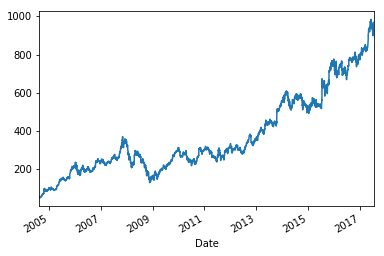

In [68]:
goog["Adj Close"].plot()

In [69]:
aapl = pd.read_csv("data/AAPL.csv", index_col=0, parse_dates=["Date"])
aapl.shape

(9231, 6)

In [78]:
aapl["Adj Close"][aapl["Adj Close"] == "null"] = np.NaN

In [79]:
aapl["Adj Close"] = aapl["Adj Close"].ffill()

In [80]:
aapl["Adj Close"] = aapl["Adj Close"].apply(lambda x: float(x))

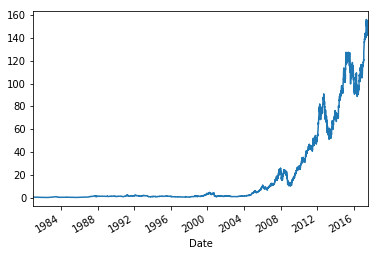

In [81]:
aapl["Adj Close"].plot()

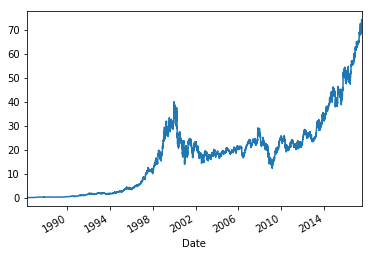

In [84]:
msft = pd.read_csv("data/MSFT.csv", index_col=0, parse_dates=["Date"])
msft["Adj Close"].plot()

In [87]:
stocks = pd.concat([aapl["Adj Close"], goog["Adj Close"], msft["Adj Close"]], axis=1, keys=["aapl", "goog", "msft"])

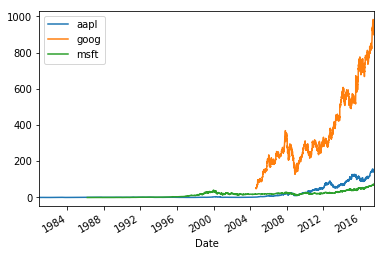

In [88]:
stocks.plot()

In [93]:
valid_stocks = stocks[stocks.index > stocks["goog"].first_valid_index()]

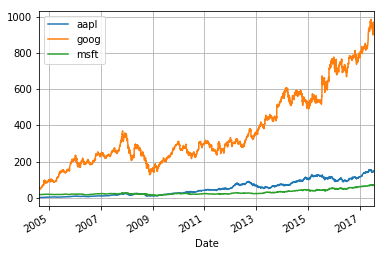

In [95]:
valid_stocks.plot(grid=True)